In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Step 2: Load the Dataset
Load your messy movie dataset into a Pandas DataFrame:

In [5]:
df = pd.read_csv("9249290-cost-revenue-clean.csv")  # Replace with your actual dataset file


Check the first few rows:

In [6]:
df.head()


,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


Step 3: Data Cleaning and Preprocessing
3.1 Handling Missing Values
Check for missing values:

In [7]:
df.isnull().sum()


production_budget_usd    0
worldwide_gross_usd      0
dtype: int64

Drop columns with too many missing values or fill missing values appropriately:

3.2 Handling Duplicates
Check and remove duplicates:

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


3.3 Feature Selection
Choose relevant features for revenue prediction. Common features include:

Budget
Duration
Genres (One-Hot Encoding)
Production Company
Director
Release Year
Keep only relevant columns:

In [10]:
print(df.columns)


Index(['production_budget_usd', 'worldwide_gross_usd'], dtype='object')


In [11]:
df.rename(columns={'production_budget_usd': 'budget', 'worldwide_gross_usd': 'revenue'}, inplace=True)


In [12]:
df = df[['budget', 'revenue']]


Step 4: Exploratory Data Analysis (EDA)
4.1 Checking Correlations
Find relationships between revenue and other numerical features:

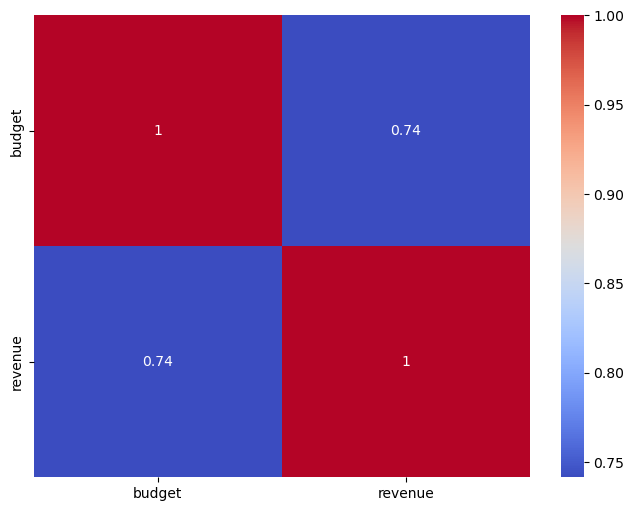

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


4.2 Visualizing Data
Scatter plot between budget and revenue:

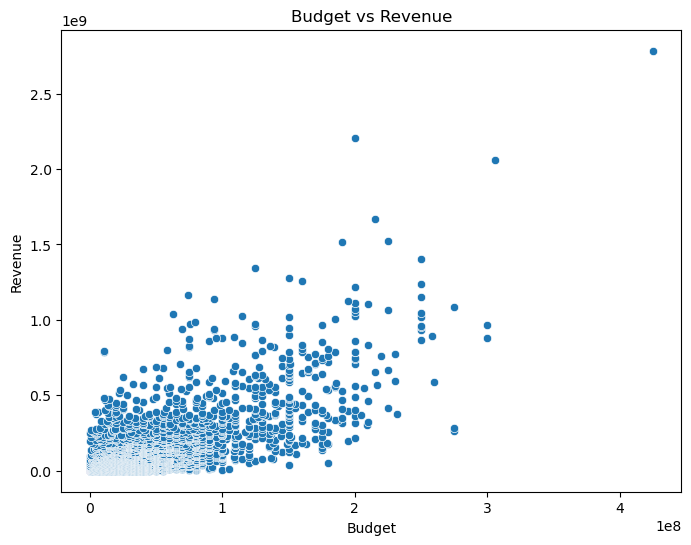

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()


Step 5: Feature Engineering
5.1 Encoding Categorical Variables
If you have categorical features (e.g., genres, director), use one-hot encoding:

In [16]:
print(df.columns)


Index(['budget', 'revenue'], dtype='object')


5.2 Handling Outliers
Check for outliers using boxplots:

In [ ]:
sns.boxplot(x=df['budget'])
plt.show()


You can remove extreme outliers:

In [ ]:
df = df[df['budget'] < df['budget'].quantile(0.99)]  # Removing top 1% outliers


In [ ]:
Step 6: Splitting Data into Training and Testing Sets

In [ ]:
X = df.drop(columns=['revenue'])  # Features
y = df['revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Train the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


Step 8: Model Evaluation
8.1 Predictions

In [ ]:
y_pred = model.predict(X_test)


8.2 Calculate Performance Metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Step 9: Model Interpretation
9.1 Check Model Coefficients

In [ ]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)


9.2 Visualizing Predictions

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


Step 10: Save and Deploy the Model
Save the trained model for future use:

In [ ]:
import joblib

joblib.dump(model, "movie_revenue_predictor.pkl")


To load and use the model later:

In [ ]:
loaded_model = joblib.load("movie_revenue_predictor.pkl")
new_predictions = loaded_model.predict(X_test)


Final Notes
Loading and cleaning messy movie data
Feature selection and encoding
Applying Linear Regression
Evaluating model performance
Visualizing results
Saving the model for future use